# Data Visualization - Composition

## Goal
- Memperkenalkan cara untuk memvisualisasikan komposisi antar data dengan python.

## Referensi
- https://www.tapclicks.com/blog/data-visualization-types

In [1]:
from matplotlib.patches import Patch
from pypalettes import load_cmap
from vega_datasets import data as data_vega

import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
import squarify

pyo.init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
df = pd.read_csv('../data/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Composition - Static

In [4]:
df['Embarked'] = df['Embarked'].map({'S': 'Southampton', 'Q': 'Quensland', 'C': 'Chainborough'})

Text(0, 0.5, '')

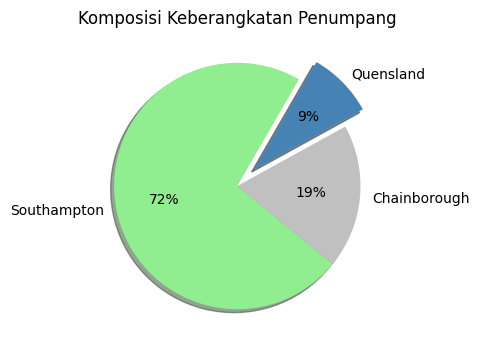

In [5]:
df['Embarked'].value_counts().plot(
    kind='pie',
    figsize=(8,4),
    title='Komposisi Keberangkatan Penumpang', 
    autopct='%1.0f%%',
    colors=['lightgreen', 'silver', 'steelblue'],
    explode=[0, 0, 0.2],
    shadow=True,
    startangle=60
)
plt.ylabel(None)

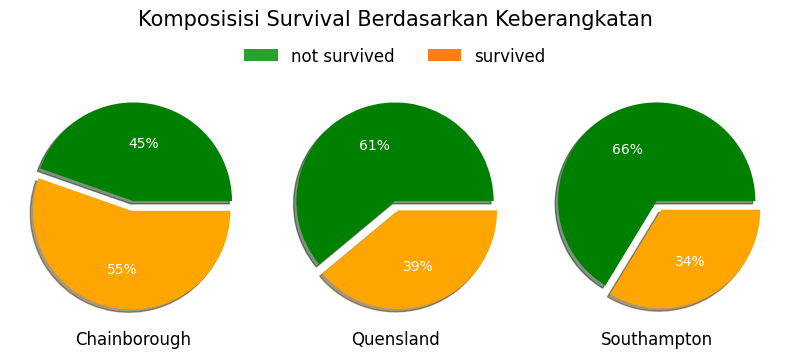

In [6]:
df_tmp = pd.crosstab(df.Survived, df.Embarked)

axes = df_tmp.plot(
    kind='pie',
    figsize=(8,4),
    autopct='%1.0f%%',
    legend=False,
    labels=['', ''],
    colors=['green', 'orange'],
    subplots=True,
    shadow=True,
    explode=[0, 0.1],
    textprops=dict(color="w")
)
fig = axes[0].get_figure()
for ax in axes:
    yl = ax.get_ylabel()
    ax.set_xlabel(yl, rotation=0, fontsize=12)
    ax.set_ylabel(None)

colors = ['tab:green', 'tab:orange']
labels = ["not survived", "survived"]
legend_elements = [Patch(fc=c, label=l) for c, l in zip(colors, labels)]
fig.legend(handles=legend_elements, loc=9, fontsize=12, ncol=2, borderaxespad=0, bbox_to_anchor=(0., 0.8, 1, .102), frameon=False)

fig.tight_layout()
fig.suptitle('Komposisisi Survival Berdasarkan Keberangkatan', fontsize=15)
plt.show()

In [7]:
df_tmp = df['Name'].str.split(' ').str[1].value_counts().reset_index()
df_tmp.loc[df_tmp['count'] < 8, 'Name'] = 'Other'
df_tmp = df_tmp.groupby('Name').sum().reset_index()
df_tmp

,Name,count
0,Master.,40
1,Miss.,179
2,Mr.,502
3,Mrs.,121
4,Other,49


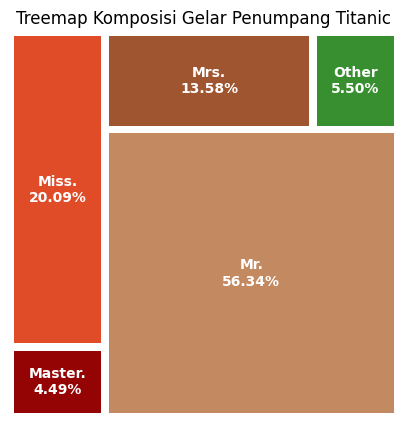

In [8]:
cmap = load_cmap('Abbott')
colors = [cmap(code) for code in df_tmp.index]
sum_ = df_tmp['count'].sum()

fig, ax = plt.subplots(figsize=(5,5))
ax.set_axis_off()

labels = ["{}\n{:.2%}".format(name, value/sum_) for name, value in zip(
    df_tmp['Name'], df_tmp['count'])]

squarify.plot(
   sizes=df_tmp["count"],
   label=labels,
   text_kwargs={
       'color':'white', 
       'fontweight':'bold',
       'fontsize':10,
       },
   color=colors,
   pad=True,
   ax=ax
)
plt.title('Treemap Komposisi Gelar Penumpang Titanic')
plt.show()

In [9]:
fig = go.Figure(go.Waterfall(
    name = "2018", 
    orientation = "h", 
    measure = [
        "relative", 
        "relative", 
        "relative", 
        "relative", 
        "total", 
        "relative",
        "relative", 
        "relative", 
        "relative", 
        "total", 
        "relative", 
        "relative", 
        "total", 
        "relative", 
        "total"
    ],
    y = [
        "Sales", 
        "Consulting", 
        "Maintenance", 
        "Other revenue", 
        "Net revenue", 
        "Purchases", 
        "Material expenses",
        "Personnel expenses", 
        "Other expenses", 
        "Operating profit", 
        "Investment income", 
        "Financial income",
        "Profit before tax", 
        "Income tax (15%)", 
        "Profit after tax"
    ],
    x = [375, 128, 78, 27, None, -327, -12, -78, -12, None, 32, 89, None, -45, None],
    connector = {"mode":"between", "line":{"width":4, "color":"rgb(0, 0, 0)", "dash":"solid"}}
))

fig.update_layout(
    title = "Profit and loss statement 2018", 
    width=800,
    height=600)

fig.show()

### 2. Composition - Changing Over Time

In [13]:
df = sns.load_dataset('mpg')

<Axes: xlabel='model_year'>

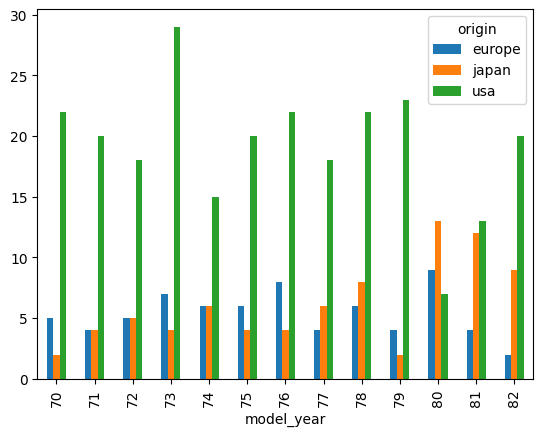

In [14]:
pd.crosstab(df['model_year'], df['origin']).plot(
    kind='bar')

<Axes: xlabel='model_year'>

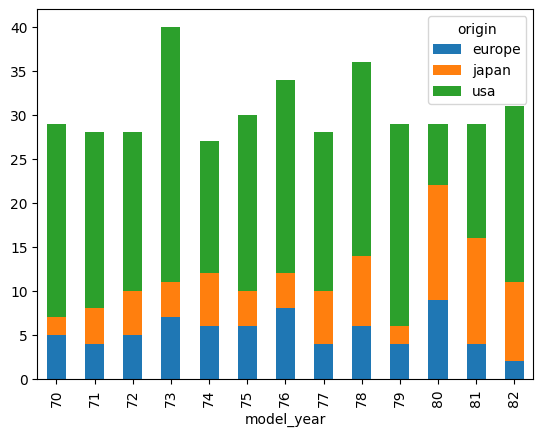

In [15]:
pd.crosstab(df['model_year'], df['origin']).plot(
    kind='bar', stacked=True)

Text(0.5, 1.0, 'Komposisi Asal Mobil Per Tahun Model')

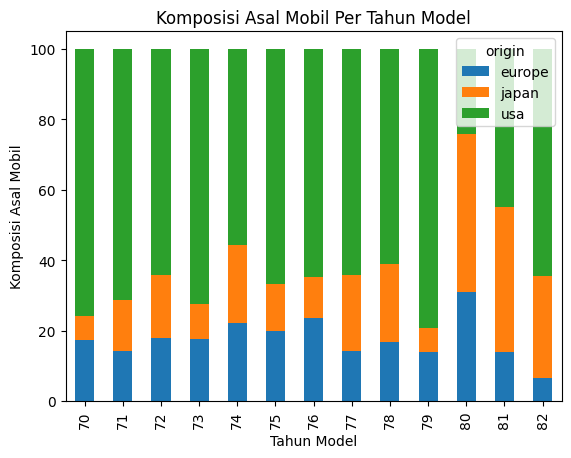

In [16]:
df.groupby('model_year')['origin'].value_counts(normalize=True).mul(100).round(2).unstack().plot(
    kind='bar', stacked=True)
plt.xlabel('Tahun Model')
plt.ylabel('Komposisi Asal Mobil')
plt.title('Komposisi Asal Mobil Per Tahun Model')

In [17]:
source = data_vega.barley()
source

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
...,...,...,...,...
115,58.16667,Wisconsin No. 38,1932,Waseca
116,47.16667,Wisconsin No. 38,1932,Morris
117,35.90000,Wisconsin No. 38,1932,Crookston
118,20.66667,Wisconsin No. 38,1932,Grand Rapids


In [18]:
title = alt.TitleParams('Yield Composition Per Site', anchor='middle')
alt.Chart(source, title=title).mark_bar().encode(
    x=alt.X('sum(yield)').stack("normalize"),
    y='variety',
    color='site'
)

alt.Chart(...)

In [19]:
df = pd.read_csv('../data/wealth.csv')
df

,year,country,total_wealth
0,2000,China,3704
1,2000,France,4704
2,2000,Germany,6160
3,2000,India,1553
4,2000,Japan,19404
...,...,...,...
171,2021,India,14225
172,2021,Japan,25692
173,2021,United Kingdom,16261
174,2021,United States,145793


In [20]:
pivot_df = df.pivot(index='year', columns='country', values='total_wealth')
pivot_df

country,China,France,Germany,India,Japan,Other,United Kingdom,United States
year,,,,,,,,
2000,3704,4704,6160,1553,19404,32331,6565,43423
2001,4136,4645,5990,1733,16324,31736,6555,45043
2002,4771,5921,7146,2004,17765,38045,7912,45185
2003,5668,7979,8955,2432,19816,48382,9557,50231
2004,6840,9833,10027,2935,20131,57202,11385,57066
2005,8522,9679,9073,3266,19476,58751,10949,62634
2006,10394,12040,10344,3833,19686,70942,13296,66897
2007,14010,14281,12302,4985,20152,84883,14524,68235
2008,17723,12907,11630,4663,24129,76574,9513,59478


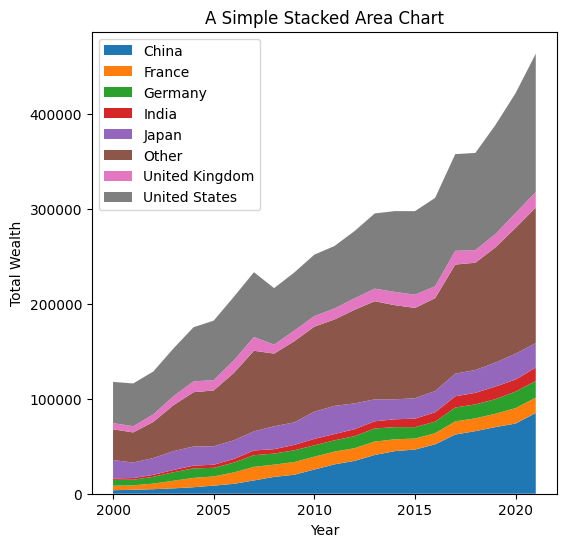

In [21]:
plt.figure(figsize=(6, 6))
plt.stackplot(pivot_df.index,
              pivot_df.values.T,
              labels=pivot_df.columns)
plt.xlabel('Year')
plt.ylabel('Total Wealth')
plt.title('A Simple Stacked Area Chart')
plt.legend(loc='upper left')

plt.show()

In [22]:
a = df.groupby(['year', 'country'])['total_wealth'].sum()
b = a.groupby(level=0).sum()
data_stack = (a/b).unstack()
data_stack

country,China,France,Germany,India,Japan,Other,United Kingdom,United States
year,,,,,,,,
2000,0.031431,0.039917,0.052272,0.013178,0.164658,0.274354,0.055709,0.368479
2001,0.035605,0.039987,0.051566,0.014919,0.140528,0.273205,0.056430,0.387760
2002,0.037057,0.045989,0.055503,0.015565,0.137982,0.295497,0.061453,0.350954
2003,0.037041,0.052144,0.058522,0.015893,0.129499,0.316181,0.062456,0.328264
2004,0.038992,0.056054,0.057160,0.016731,0.114760,0.326088,0.064902,0.325313
2005,0.046734,0.053079,0.049756,0.017911,0.106806,0.322188,0.060044,0.343482
2006,0.050108,0.058043,0.049867,0.018478,0.094903,0.342001,0.064098,0.322501
2007,0.060033,0.061194,0.052714,0.021361,0.086351,0.363724,0.062235,0.292387
2008,0.081817,0.059584,0.053689,0.021526,0.111390,0.353499,0.043916,0.274577


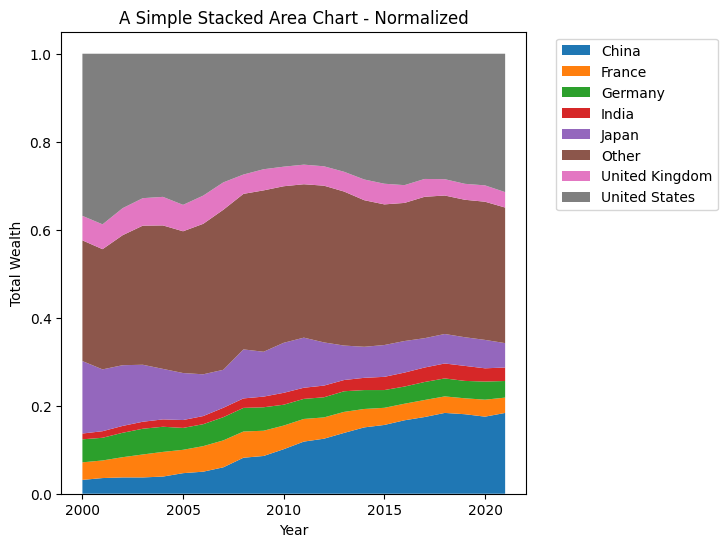

In [23]:
plt.figure(figsize=(6, 6))
plt.stackplot(data_stack.index,
              data_stack.values.T,
              labels=data_stack.columns)
plt.xlabel('Year')
plt.ylabel('Total Wealth')
plt.title('A Simple Stacked Area Chart - Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()